In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [70]:
im = cv2.imread('./im.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
print(im.shape)

(1200, 1920, 3)


160 100


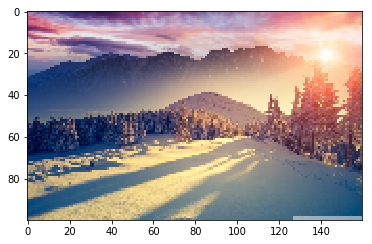

In [71]:
new_r = 100
new_c = int((float(im.shape[1])/im.shape[0])*new_r)  

img = cv2.resize(im,(new_c,new_r))
print(new_c,new_r)

plt.imshow(img)
plt.show()

In [72]:
data = np.reshape(img,(-1,3)) 




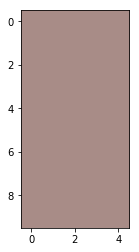

In [73]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 8)
km.fit(data)
centroids = np.array(km.cluster_centers_, dtype = np.uint8)
freq = np.unique(km.labels_, return_counts = True)
label_id = freq[0][freq[1].argmax()]
most_dom_color = centroids[label_id]
display_stamp = np.zeros((10,5,3),dtype = np.uint8)
display_stamp [:,:,:] = most_dom_color
plt.imshow(display_stamp)
plt.show()


In [74]:
print(freq)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([1343, 2250, 1216, 2430, 2352, 1790, 2043, 2576]))


In [75]:
sum2 = freq[1].sum()
print(sum2)


16000


In [76]:
ind = np.lexsort((freq[0],freq[1]))

In [77]:
ind2 = list(ind)
print(ind2)
ind2.reverse()
print(ind2)

ind2 = np.array(ind2)
width = []
for ix in list(range(freq[1].shape[0])):
    width.append(float(freq[1][ix])/sum2)
print(width)

[2, 0, 5, 6, 1, 4, 3, 7]
[7, 3, 4, 1, 6, 5, 0, 2]
[0.0839375, 0.140625, 0.076, 0.151875, 0.147, 0.111875, 0.1276875, 0.161]


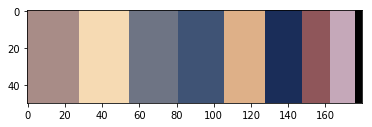

In [78]:
sum = np.sum(ind2)

display_stamp1 = np.zeros((50,180,3), dtype = np.uint8)
start_point = 0

for ix in ind2:
    width2 = width[ix]*180
    width2 = int(width2)
    most_dom = centroids[ix]
    display_stamp1[:,start_point:start_point+width2,:] = most_dom
    start_point += width2
    
    plt.imshow(display_stamp1)
plt.show()